In [ ]:
'''
Assignment 4: News Category Classification
Dataset: BBC News
Link: https://raw.githubusercontent.com/catalyst/machine-learning-tutorials/master/datasets/bbctext.csv
Task:
 Predict news category (business, tech, politics…)
 Clean text (lowercase, stopwords removal).
 Apply TF-IDF Vectorizer.
 Train MultinomialNB.
 Evaluate using accuracy and confusion matrix.

'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [11]:
df = pd.read_csv('BBC News Train.csv')  ## load the datset

In [12]:
df  ## show the dataset

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [13]:
df.isnull().sum()  ## check null value

ArticleId    0
Text         0
Category     0
dtype: int64

In [14]:
import nltk

In [15]:
from nltk.corpus import stopwords

In [16]:
import re

In [17]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()                       # lowercase
    text = re.sub(r'[^a-z\s]', '', text)      # remove numbers, punctuation
    words = text.split()
    words = [w for w in words if w not in stop_words]  # remove stopwords
    return " ".join(words)

[nltk_data] Downloading package stopwords to C:\Users\Saikat
[nltk_data]     Maiti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
df['Text'] = df['Text'].apply(clean_text)  ## apply above fuction

In [19]:
df

,ArticleId,Text,Category
0,1833,worldcom exboss launches defence lawyers defen...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens maj...,business
3,1976,lifestyle governs mobile choice faster better ...,tech
4,917,enron bosses payout eighteen former enron dire...,business
...,...,...,...
1485,857,double eviction big brother model caprice holb...,entertainment
1486,325,dj double act revamp chart show dj duo jk joel...,entertainment
1487,1590,weak dollar hits reuters revenues media group ...,business
1488,1587,apple ipod family expands market apple expande...,tech


In [20]:
df['Category'].unique()  ## unique value of this column

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [21]:
df['ArticleId'].unique()  ## unique value of this column

array([1833,  154, 1101, ..., 1590, 1587,  538], dtype=int64)

In [22]:
df1 = df.drop(['ArticleId'],axis=1)  ## drop the unnecessary column

In [23]:
df1  ## show the new dataset

,Text,Category
0,worldcom exboss launches defence lawyers defen...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens maj...,business
3,lifestyle governs mobile choice faster better ...,tech
4,enron bosses payout eighteen former enron dire...,business
...,...,...
1485,double eviction big brother model caprice holb...,entertainment
1486,dj double act revamp chart show dj duo jk joel...,entertainment
1487,weak dollar hits reuters revenues media group ...,business
1488,apple ipod family expands market apple expande...,tech


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
tfidf = TfidfVectorizer()  ## create object of tfidfvectorizer

In [27]:
x = tfidf.fit_transform(df1['Text'])  ## fit and transform of tfidfvectorizer

In [29]:
print(x)

  (0, 24922)	0.49516464072198674
  (0, 7690)	0.06906772030120831
  (0, 12612)	0.05430824211721554
  (0, 5729)	0.04068950831555767
  (0, 12642)	0.14743185211916926
  (0, 5737)	0.04914395070638976
  (0, 8741)	0.05481399050469061
  (0, 3826)	0.08284723980096079
  (0, 2176)	0.05854157774094306
  (0, 6969)	0.34519251722266064
  (0, 1942)	0.05501829341355408
  (0, 8868)	0.17248423045940986
  (0, 3722)	0.12157716386037451
  (0, 3217)	0.030556788501631637
  (0, 4415)	0.053077917013011205
  (0, 24658)	0.07295260632986739
  (0, 8430)	0.019437416169464424
  (0, 24826)	0.11506417240755355
  (0, 5429)	0.06906772030120831
  (0, 4896)	0.22314082895198376
  (0, 7764)	0.07295260632986739
  (0, 11499)	0.05302883673504882
  (0, 151)	0.3498434344786323
  (0, 578)	0.06417334273538297
  (0, 6228)	0.047666985585609355
  :	:
  (1489, 19830)	0.11737322648605479
  (1489, 13483)	0.15601018501998487
  (1489, 17774)	0.13002655780953853
  (1489, 24110)	0.04886085917857581
  (1489, 21797)	0.057929219597650086
  (148

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()  ## create object of label encoder

In [33]:
df1['Category'] = df1[['Category']].apply(le.fit_transform)  ## apply label encoder of this column

In [34]:
df1  ## show new dataset

,Text,Category
0,worldcom exboss launches defence lawyers defen...,0
1,german business confidence slides german busin...,0
2,bbc poll indicates economic gloom citizens maj...,0
3,lifestyle governs mobile choice faster better ...,4
4,enron bosses payout eighteen former enron dire...,0
...,...,...
1485,double eviction big brother model caprice holb...,1
1486,dj double act revamp chart show dj duo jk joel...,1
1487,weak dollar hits reuters revenues media group ...,0
1488,apple ipod family expands market apple expande...,4


In [35]:
y = df1['Category']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)  ## spliting 80% for training and 20% for testing

In [38]:
from sklearn.naive_bayes import MultinomialNB

In [39]:
mn = MultinomialNB()  ## create object of multinomial naive bayes

In [40]:
mn.fit(x_train , y_train) ## fit the model

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [41]:
y_pred = mn.predict(x_test)  ## predict the model

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [43]:
accuracy_score(y_test,y_pred)  ## accuracy score

0.9664429530201343

[[66  0  0  1  1]
 [ 2 62  3  0  0]
 [ 1  0 42  1  1]
 [ 0  0  0 69  0]
 [ 0  0  0  0 49]]


Text(50.72222222222221, 0.5, 'Actual Values')

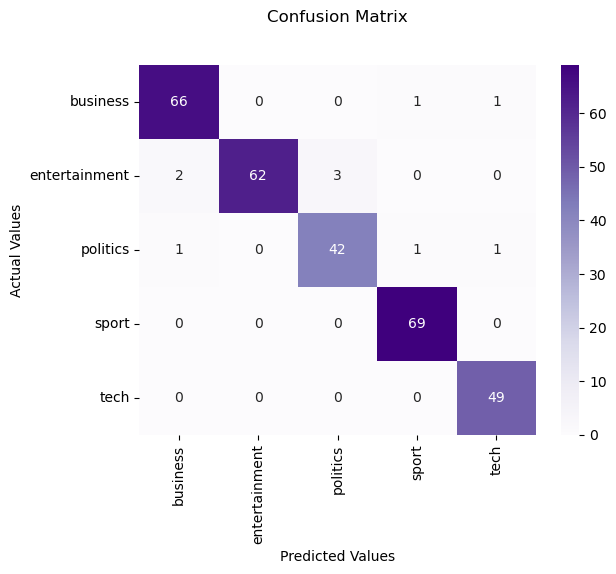

In [50]:
## show confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='Purples',xticklabels=['business', 'entertainment', 'politics', 'sport', 'tech'],yticklabels=['business', 'entertainment', 'politics', 'sport', 'tech'])
plt.title('Confusion Matrix\n\n')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [46]:
le.classes_  ## labelling 

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [52]:
print(classification_report(y_test,y_pred))  ## show classification report

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        68
           1       1.00      0.93      0.96        67
           2       0.93      0.93      0.93        45
           3       0.97      1.00      0.99        69
           4       0.96      1.00      0.98        49

    accuracy                           0.97       298
   macro avg       0.96      0.97      0.96       298
weighted avg       0.97      0.97      0.97       298



In [ ]:
'''

Model Interpretation :

        1. Data Preprocessing Interpretation:
                    Text data was cleaned effectively by converting to lowercase and removing stopwords.
                    This reduced noise and improved the quality of textual features.
                    Important contextual words were preserved, helping the model distinguish between news categories.
        2. TF-IDF Vectorizer Interpretation:
                    TF-IDF captured important and discriminative words across documents.
                    It reduced the impact of frequently occurring but less informative words.
                    This representation is well-suited for news articles, where word importance varies by category.
        3. Multinomial Naive Bayes Interpretation:
                    Multinomial Naive Bayes is ideal for TF-IDF and count-based text features.
                    It assumes word independence, which works well in high-dimensional text classification.
                    The model learned category-specific word distributions effectively.
        4. Overall Model Performance:
                    Accuracy = 97%, indicating outstanding classification capability.
                    Macro F1 = 0.96, showing consistent performance across all categories.
                    Weighted F1 = 0.97, confirming strong performance even with class imbalance.
                    The model generalizes well and is not biased toward any single class.
        5. Why the Model Performed So Well:
                    Cleaned text reduced noise.
                    TF-IDF highlighted discriminative keywords.
                    Multinomial Naive Bayes matched the nature of text data.
                    BBC news categories are topic-distinct, aiding separability.


'''

In [ ]:
'''

Conclusion :

        1. Text preprocessing significantly improved data quality.
        2. TF-IDF vectorization effectively captured informative words.
        3. Multinomial Naive Bayes proved highly suitable for news classification.
        4. The model achieved 97% accuracy, indicating excellent performance.
        5. Precision and recall were consistently high across all categories.
        6. Confusion between categories was minimal.
        7. The model generalized well without overfitting.
        8. This approach is reliable for real-world news categorization tasks.


'''